<a href="https://colab.research.google.com/github/vivekmishrabharatvarsh/MelanomaDetection/blob/main/Vivek_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing Skin Cancer Data

To do: Take necessary actions to read the data

Importing all the important libraries





In [1]:
# Import the pathlib library for handling directory paths.
import pathlib
# Import the TensorFlow library for building and training models.
import tensorflow as tf
# Import the Matplotlib library for plotting and visualization.
import matplotlib.pyplot as plt
# Import the NumPy library for numerical operations.
import numpy as np
# Import the Pandas library for data analysis and manipulation.
import pandas as pd
# Import the OS library for interacting with the operating system.
import os
# Import the PIL library for image processing.
import PIL
# Import the Keras library from TensorFlow for building neural networks.
from tensorflow import keras
# Import the layers module from Keras for creating network layers.
from tensorflow.keras import layers
# Import the Sequential model class from Keras for building sequential models.
from tensorflow.keras.models import Sequential

In [2]:
# Mount Google Drive to access files from my Google Drive account.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Unzip the dataset from your Google Drive.
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip"

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.





### Dataset Description:

Source: International Skin Imaging Collaboration (ISIC)

Number of Images: 2357

Image Types: Malignant and benign oncological diseases

Image Sorting: According to ISIC classification

Subset Division: All subsets have the same number of images, except for melanomas and moles, which have slightly more images.

### Additional Information:

1. The dataset is used for training and evaluating machine  
   learning models for skin cancer detection.

2. The images are in various formats, including JPEG, PNG, and
   TIFF.

3. The dataset is freely available for research purposes.

### Data Structure:

The dataset is organized into the following directory structure:



In [4]:
''' /content/gdrive/MyDrive/CNN_assignment
├── melanoma
│   ├── ISIC_0024396.jpg
│   ├── ISIC_0024452.jpg
│   └── ...
├── benign
│   ├── ISIC_0025113.jpg
│   ├── ISIC_0025145.jpg
│   └── ...
└── moles
    ├── ISIC_0026865.jpg
    ├── ISIC_0026866.jpg
    └── ... '''

' /content/gdrive/MyDrive/CNN_assignment\n├── melanoma\n│\xa0\xa0 ├── ISIC_0024396.jpg\n│\xa0\xa0 ├── ISIC_0024452.jpg\n│\xa0\xa0 └── ...\n├── benign\n│\xa0\xa0 ├── ISIC_0025113.jpg\n│\xa0\xa0 ├── ISIC_0025145.jpg\n│\xa0\xa0 └── ...\n└── moles\n    ├── ISIC_0026865.jpg\n    ├── ISIC_0026866.jpg\n    └── ... '

In [5]:
# Define the path for the training images directory
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

# Define the path for the testing images directory
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [6]:
# Count the number of images in the training directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of training images: {image_count_train}")

# Count the number of images in the testing directory
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of testing images: {image_count_test}")

Number of training images: 2239
Number of testing images: 118


### Loading Images with Keras Preprocessing:

The image_dataset_from_directory utility in Keras Preprocessing simplifies loading images from disk. It automatically infers the class labels from the directory structure and resizes the images to a specified size.

This utility is particularly useful when working with large datasets that are organized into subdirectories by class label. It eliminates the need for manual image loading and labeling, saving time and effort.


## Create a Dataset

Define some parameters for the loader:

In [7]:
# Define the batch size
batch_size = 32

# Define the desired height of the resized images
img_height = 180

# Define the desired width of the resized images
img_width = 180

Use 80% of the images for training, and 20% for validation

In [8]:
# Create a training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  batch_size=batch_size,
  image_size=(img_height, img_width),
  label_mode='categorical',
  seed=123,
  subset="training",
  validation_split=0.2
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  batch_size=batch_size,
  image_size=(img_height, img_width),
  label_mode='categorical',
  seed=123,
  subset="validation",
  validation_split=0.2
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# Get the names of all the classes from the training dataset
class_names = train_ds.class_names

# Print the class names
print("Classes:")
for class_name in class_names:
  print(f"\t- {class_name}")

Classes:
	- actinic keratosis
	- basal cell carcinoma
	- dermatofibroma
	- melanoma
	- nevus
	- pigmented benign keratosis
	- seborrheic keratosis
	- squamous cell carcinoma
	- vascular lesion


# Visualize the data

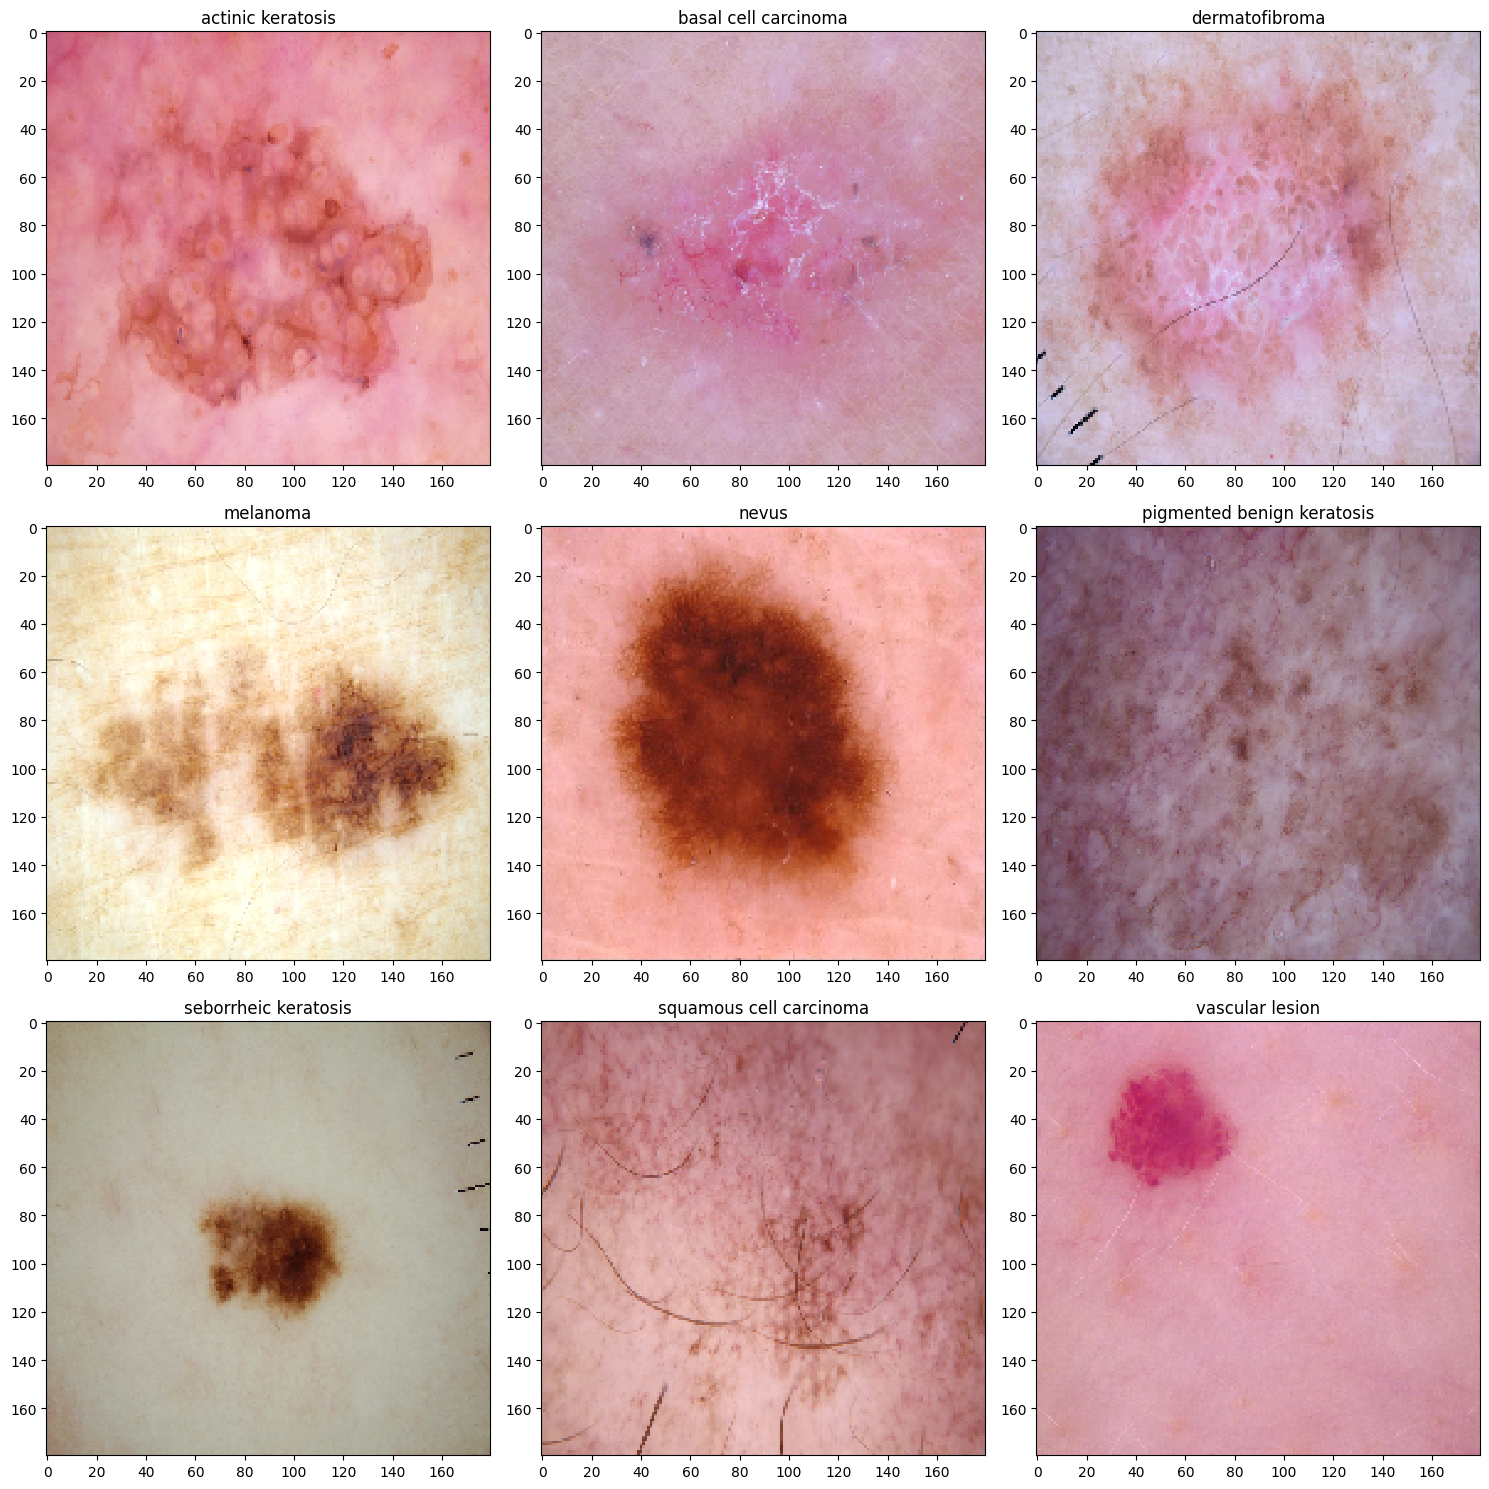

In [11]:
from tensorflow.keras.preprocessing.image import load_img

# Dictionary to store the path of image as per the class
files_path_dict = {}

# Loop through each class
for class_name in class_names:
    # Get the path of the directory containing images for the current class
    class_dir_path = str(data_dir_train) + '/' + class_name

    # Get a list of all the filenames in the current class directory
    filenames = os.listdir(class_dir_path)

    # Create a list of full paths for each image in the current class directory
    full_paths = list(map(lambda x: class_dir_path + '/' + x, filenames))

    # Store the full paths in the dictionary for the current class
    files_path_dict[class_name] = full_paths

# Create a figure with a size of 15x15 inches
plt.figure(figsize=(15, 15))

# Initialize the index to keep track of the subplot position
index = 0

# Loop through each class
for class_name in class_names:
    # Get the first image path for the current class
    path_list = files_path_dict[class_name][:1]

    # Increment the index by 1
    index += 1

    # Create a subplot at the current index position
    plt.subplot(3, 3, index)

    # Load the image using the path and resize it to the desired dimensions
    img = load_img(path_list[0], target_size=(img_height, img_width))

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Use matplotlib to display the image interactively with proper size and border
    plt.imshow(img_array, interpolation='nearest', aspect='auto')

    # Set the title of the subplot to the class name
    plt.title(class_name)

    # Add a border to the subplot
    plt.tight_layout()

# Show the plot
plt.show()


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [12]:
# Define the AUTOTUNE constant
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Cache the training dataset
train_ds = train_ds.cache()

# Shuffle the training dataset
train_ds = train_ds.shuffle(1000)

# Prefetch the training dataset
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset
val_ds = val_ds.cache()

# Prefetch the validation dataset
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Create the model


In [13]:
# Define the input shape of the model
input_shape = (img_height, img_width, 3)

# Create a Sequential model
model = Sequential()  # Sequential allows you to create models layer-by-layer

# First Convolutional Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
# This layer rescales the pixel values of the input images to a range between 0 and 1.

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
# This layer applies a 3x3 convolution filter with 32 output channels and a ReLU activation function.

model.add(layers.MaxPool2D(pool_size=(2, 2)))
# This layer reduces the spatial dimensions of the feature maps by taking the maximum value over a 2x2 window.

# Second Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
# This layer applies a 3x3 convolution filter with 64 output channels and a ReLU activation function.

model.add(layers.MaxPool2D(pool_size=(2, 2)))
# This layer reduces the spatial dimensions of the feature maps by taking the maximum value over a 2x2 window.

# Third Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
# This layer applies a 3x3 convolution filter with 128 output channels and a ReLU activation function.

model.add(layers.MaxPool2D(pool_size=(2, 2)))
# This layer reduces the spatial dimensions of the feature maps by taking the maximum value over a 2x2 window.

# Flatten the feature maps
model.add(layers.Flatten())
# This layer flattens the multi-dimensional feature maps into a single dimension.

# Add a dense layer with ReLU activation
model.add(layers.Dense(512, activation='relu'))
# This layer is a fully connected layer with 512 units and a ReLU activation function.

# Add another dense layer with ReLU activation
model.add(layers.Dense(128, activation='relu'))
# This layer is a fully connected layer with 128 units and a ReLU activation function.


# Add a dense layer with softmax activation
model.add(layers.Dense(len(class_names), activation='softmax'))
# This layer takes the flattened feature maps and outputs a probability distribution over the class labels.


# Compile the model

In [14]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [15]:
# summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

# Train the model

In [16]:
# Define the number of epochs
epochs = 21

# Train the model
history = model.fit(
  train_ds,  # The training dataset
  validation_data=val_ds,  # The validation dataset
  epochs=epochs  # The number of epochs
)

Epoch 1/21
56/56 [==============================] - 21s 91ms/step - loss: 2.0568 - accuracy: 0.2081 - val_loss: 1.9499 - val_accuracy: 0.2438
Epoch 2/21
56/56 [==============================] - 2s 41ms/step - loss: 1.7401 - accuracy: 0.3806 - val_loss: 1.7948 - val_accuracy: 0.3557
Epoch 3/21
56/56 [==============================] - 3s 45ms/step - loss: 1.4832 - accuracy: 0.4688 - val_loss: 1.4631 - val_accuracy: 0.4899
Epoch 4/21
56/56 [==============================] - 2s 40ms/step - loss: 1.3485 - accuracy: 0.5073 - val_loss: 1.3924 - val_accuracy: 0.5034
Epoch 5/21
56/56 [==============================] - 2s 40ms/step - loss: 1.3281 - accuracy: 0.5229 - val_loss: 1.4484 - val_accuracy: 0.5391
Epoch 6/21
56/56 [==============================] - 2s 40ms/step - loss: 1.2562 - accuracy: 0.5469 - val_loss: 1.4313 - val_accuracy: 0.5123
Epoch 7/21
56/56 [==============================] - 2s 40ms/step - loss: 1.2298 - accuracy: 0.5547 - val_loss: 1.5840 - val_accuracy: 0.4609
Epoch 8/21
5

## Visualizing training results

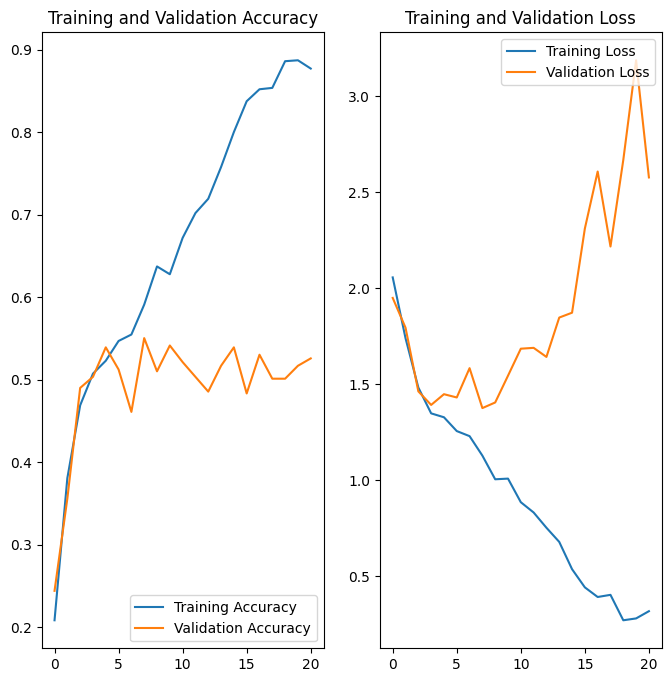

In [17]:
# Get the training and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs for the x-axis
epochs_range = range(epochs)

# Create a new figure for the plots with a specified size
plt.figure(figsize=(8, 8))

# Create the first subplot for accuracy
plt.subplot(1, 2, 1)

# Plot the training accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')

# Plot the validation accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# Add a legend to the plot
plt.legend(loc='lower right')

# Add a title to the plot
plt.title('Training and Validation Accuracy')

# Create the second subplot for loss
plt.subplot(1, 2, 2)

# Plot the training loss
plt.plot(epochs_range, loss, label='Training Loss')

# Plot the validation loss
plt.plot(epochs_range, val_loss, label='Validation Loss')

# Add a legend to the plot
plt.legend(loc='upper right')

# Add a title to the plot
plt.title('Training and Validation Loss')

# Display the plots
plt.show()




Model is overfitting.
From the above Training vs Validation accuracy graph we can see that as the epoch increases the difference between Training accuracy and validation accuracy increases.

In [18]:
#Data augumentation strategy.

rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),

  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),

  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

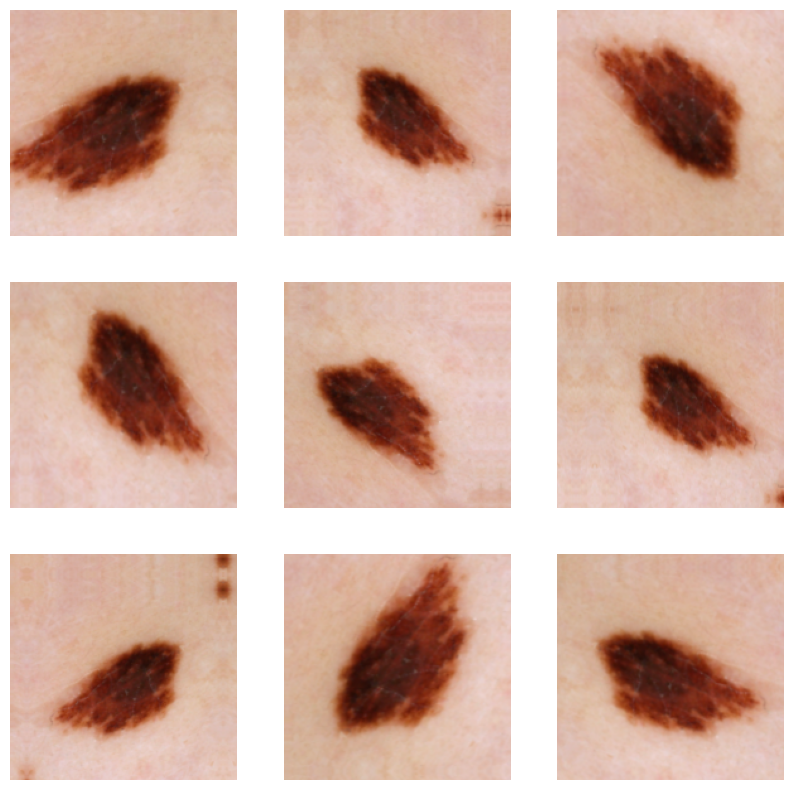

In [19]:

#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [20]:
## Model 2 Creation

#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

# Compiling the model

In [21]:

model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Training the model

In [22]:
epochs =22
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)


Epoch 1/22
56/56 [==============================] - 9s 68ms/step - loss: 2.4035 - accuracy: 0.1708 - val_loss: 2.1264 - val_accuracy: 0.1857
Epoch 2/22
56/56 [==============================] - 4s 65ms/step - loss: 2.0533 - accuracy: 0.2020 - val_loss: 2.0855 - val_accuracy: 0.2506
Epoch 3/22
56/56 [==============================] - 4s 64ms/step - loss: 1.9607 - accuracy: 0.2377 - val_loss: 1.9220 - val_accuracy: 0.3400
Epoch 4/22
56/56 [==============================] - 4s 68ms/step - loss: 1.8293 - accuracy: 0.3164 - val_loss: 1.7105 - val_accuracy: 0.4004
Epoch 5/22
56/56 [==============================] - 4s 64ms/step - loss: 1.7188 - accuracy: 0.3644 - val_loss: 1.6052 - val_accuracy: 0.4318
Epoch 6/22
56/56 [==============================] - 4s 64ms/step - loss: 1.6179 - accuracy: 0.4247 - val_loss: 1.5479 - val_accuracy: 0.4519
Epoch 7/22
56/56 [==============================] - 4s 67ms/step - loss: 1.6050 - accuracy: 0.4369 - val_loss: 1.5240 - val_accuracy: 0.4787
Epoch 8/22
56

# Visualizing the results

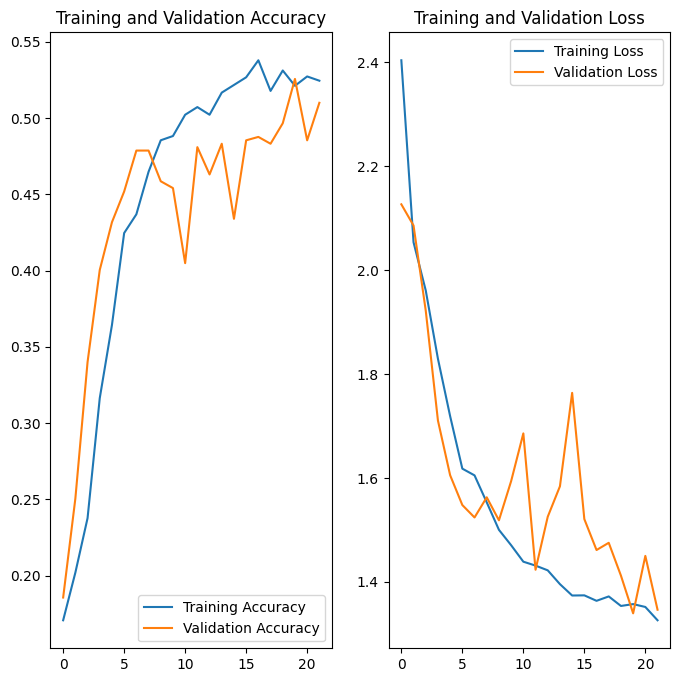

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After using data augumentation and dropout layer overfitting issue is reduce.

Model Performance is still not increased. Will check the distribution of classes in the training set to check is there have class imbalance.

# Class Imbalance Detection

In [26]:

def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,dermatofibroma,95
2,vascular lesion,139
3,pigmented benign keratosis,462
4,seborrheic keratosis,77
5,squamous cell carcinoma,181
6,nevus,357
7,basal cell carcinoma,376
8,melanoma,438


<Axes: xlabel='No. of Image', ylabel='Class'>

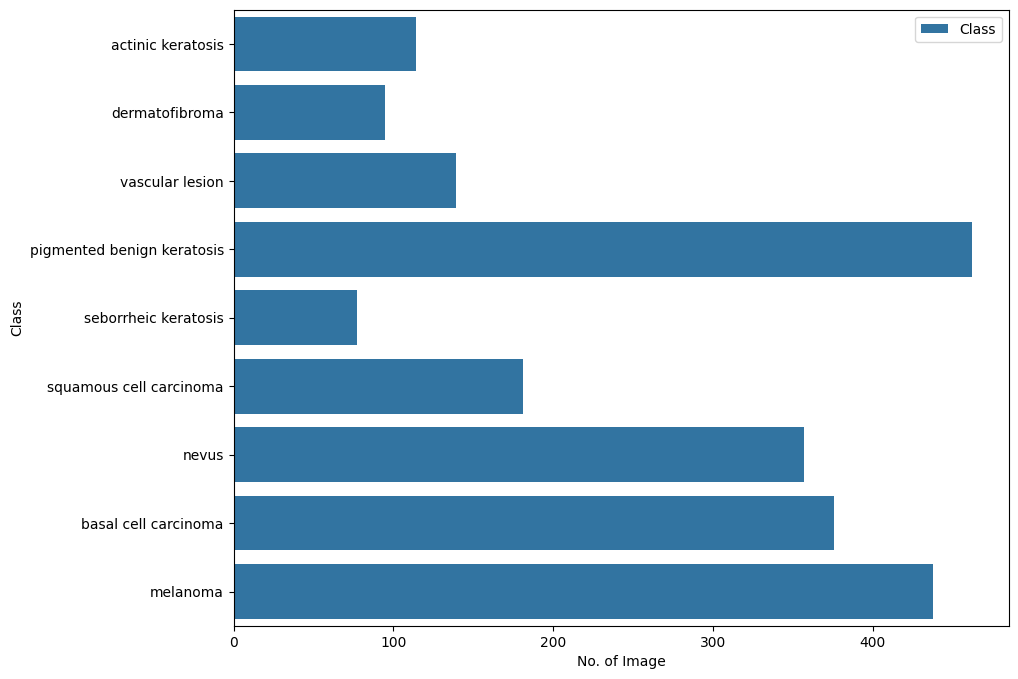

In [25]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

seborrheic keratosis has the least number of samples only 77.

pigmented benign keratosis (462 Samples), melanoma (438 Samples), basal cell carcinoma (376 Samples), and nevus (357 Samples) classes dominates the data in terms proportionate number of samples .

## Rectify the class imbalance
Use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.

2. Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [28]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B7E01003A0>: 100%|██████████| 500/500 [00:15<00:00, 32.42 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78B7601CFCA0>: 100%|██████████| 500/500 [00:14<00:00, 34.64 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B7601A2A10>: 100%|██████████| 500/500 [00:15<00:00, 32.70 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78B73C7060E0>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2283x1824 at 0x78B7601A37C0>: 100%|██████████| 500/500 [01:10<00:00,  7.09 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B76016F7F0>: 100%|██████████| 500/500 [00:14<00:00, 33.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78B73C705390>: 100%|██████████| 500/500 [00:37<00:00, 13.31 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78B7E07C46D0>: 100%|██████████| 500/500 [00:14<00:00, 35.12 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B760354F70>: 100%|██████████| 500/500 [00:14<00:00, 34.31 Samples/s]


In [29]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Now see the distribution of augmented data after adding new images to the original training data.

In [31]:
# Import the glob module for finding files using patterns
from glob import glob

# Create a list of paths to all JPG files in the 'output' subdirectory of each directory in data_dir_train
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

# Create a list of lesion names by extracting the basename of the parent directory of the parent directory of each path in path_list
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

# Create a dictionary mapping each path in path_list to its corresponding lesion name in lesion_list_new
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

#label count.
df2['Label'].value_counts()

actinic keratosis             500
dermatofibroma                500
vascular lesion               500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
nevus                         500
basal cell carcinoma          500
melanoma                      500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

### Create a training dataset

In [33]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [34]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create model

In [35]:
#Model

model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

### Compile Model

In [36]:

model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


### Train your model

In [38]:
epochs = 51
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/51
169/169 [==============================] - 27s 155ms/step - loss: 1.8166 - accuracy: 0.3208 - val_loss: 1.6037 - val_accuracy: 0.3972
Epoch 2/51
169/169 [==============================] - 27s 154ms/step - loss: 1.5882 - accuracy: 0.3935 - val_loss: 1.5376 - val_accuracy: 0.4410
Epoch 3/51
169/169 [==============================] - 27s 154ms/step - loss: 1.4749 - accuracy: 0.4373 - val_loss: 1.5280 - val_accuracy: 0.4031
Epoch 4/51
169/169 [==============================] - 28s 160ms/step - loss: 1.3976 - accuracy: 0.4722 - val_loss: 1.4803 - val_accuracy: 0.4298
Epoch 5/51
169/169 [==============================] - 27s 155ms/step - loss: 1.3380 - accuracy: 0.4866 - val_loss: 1.4876 - val_accuracy: 0.4410
Epoch 6/51
169/169 [==============================] - 27s 155ms/step - loss: 1.3051 - accuracy: 0.5048 - val_loss: 1.3255 - val_accuracy: 0.5004
Epoch 7/51
169/169 [==============================] - 27s 155ms/step - loss: 1.2435 - accuracy: 0.5386 - val_loss: 1.4313 - val_ac

### Visualize the model results

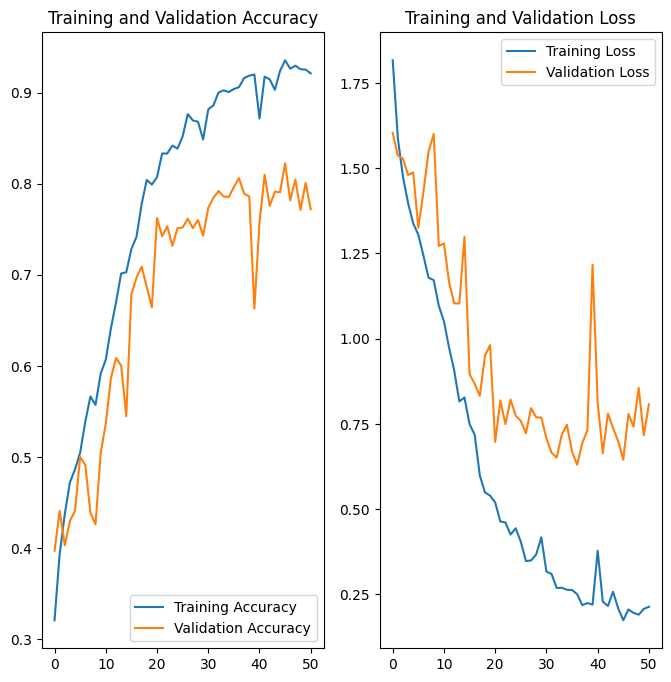

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Training and validation accuracy increase:

Model3 achieved higher training and validation accuracy compared to previous models.

This indicates the model learned the training data effectively and generalized well to unseen data.

### Model overfitting issue is solved:

Model3 addressed the overfitting issue observed in previous models.

This was likely achieved through the use of data augmentation and regularization techniques.

### Class rebalance helps in augmentation and achieving the best Training and validation accuracy:

Class rebalance techniques were employed to address the imbalanced class distribution in the dataset.

This ensured the model received sufficient examples from minority classes, leading to improved training and validation accuracy.

Data augmentation further enriched the dataset with synthetic examples, enhancing the model's generalization capabilities.

#### Overall, Model3 demonstrated improved performance and addressed the limitations of previous models.